### 課題 Assignment

### 1. パッケージをインポートする Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 確率変数と確率分布をファイルから読み込む Load the R.V. and probability 

In [2]:
df = pd.read_csv('data/rand_distribution.csv', header=0, names=['variable', 'probability'], dtype={'variable': int, 'probability': float})

### 辞書型に変換　Convert to dictionary type

In [3]:
prob_dist = dict(df.to_numpy())

### 2. 棒グラフを使って確率分布を図示しなさい Plot the probability distribution by using a bar graph

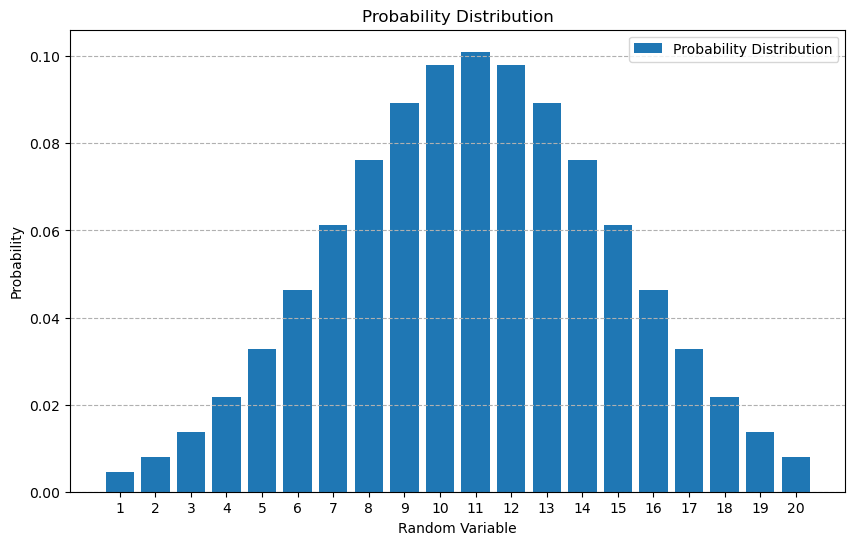

In [4]:
variables = list(prob_dist.keys())
probabilities = list(prob_dist.values())

plt.figure(figsize=(10, 6))
plt.bar(variables, probabilities, width=0.8, label='Probability Distribution') # widthを調整
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.xticks(variables)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

### 3. 累積分布を定義しなさい Define a function of the CDF

In [5]:
def calculate_cdf(prob_dist):
    cdf = {}
    cumulative_prob = 0
    sorted_variables = sorted(prob_dist.keys())
    for var in sorted_variables:
        cumulative_prob += prob_dist[var]
        cdf[var] = cumulative_prob
    return cdf

###  累積分布を求めなさい Calculate the CDF

In [6]:
cdf = calculate_cdf(prob_dist)
cdf

{1.0: 0.004439227,
 2.0: 0.012477628000000001,
 3.0: 0.026151409,
 4.0: 0.048002049000000005,
 5.0: 0.08080374500000001,
 6.0: 0.127061551,
 7.0: 0.188343187,
 8.0: 0.264609415,
 9.0: 0.353773669,
 10.0: 0.451701444,
 11.0: 0.552737781,
 12.0: 0.6506655560000001,
 13.0: 0.73982981,
 14.0: 0.8160960380000001,
 15.0: 0.8773776740000001,
 16.0: 0.9236354800000001,
 17.0: 0.9564371760000001,
 18.0: 0.9782878160000001,
 19.0: 0.9919615970000002,
 20.0: 0.9999999980000002}

###  累積分布を図示しなさい Plot the CDF

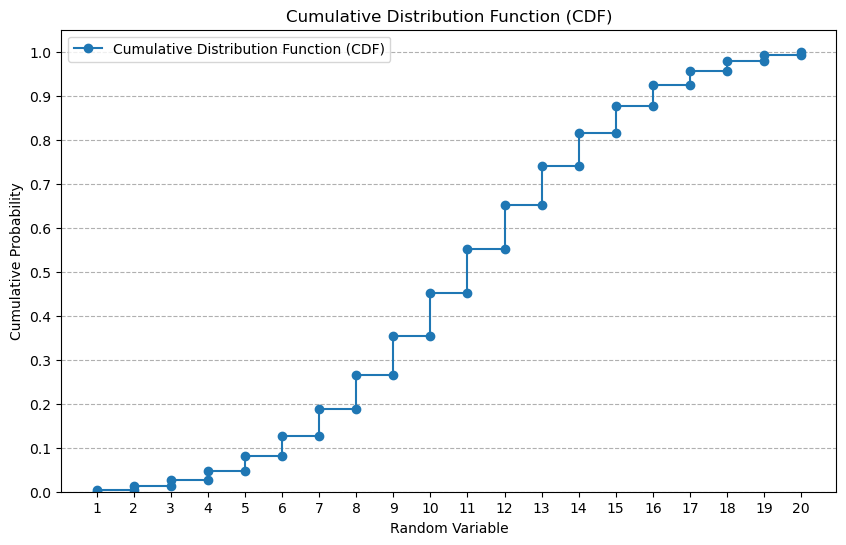

In [7]:
cdf_variables = list(cdf.keys())
cdf_probabilities = list(cdf.values())

plt.figure(figsize=(10, 6))
plot_vars = [cdf_variables[0]] + [v for v in cdf_variables for _ in (0, 1)][1:]
plot_probs = [0] + [p for p in cdf_probabilities for _ in (0, 1)][:-1]

plt.plot(plot_vars, plot_probs, drawstyle='steps-post', marker='o', linestyle='-', label='Cumulative Distribution Function (CDF)')

plt.xlabel('Random Variable')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.xticks(cdf_variables)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

### 4. 期待値を求める関数を定義しなさい Define a function of expected value

In [8]:
def calculate_expected_value(prob_dist):
    expected_value = 0
    for var, prob in prob_dist.items():
        expected_value += var * prob
    return expected_value

###  分散を求める関数を定義しなさい Define a function of variance

In [9]:
def calculate_variance(prob_dist, expected_value):
    variance = 0
    for var, prob in prob_dist.items():
        variance += (var - expected_value)**2 * prob
    return variance

###  標準偏差を求める関数を定義しなさい Define a function of standard deviation

In [10]:
def calculate_std_dev(variance):
    return np.sqrt(variance)

###  期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation

In [11]:
E_X = calculate_expected_value(prob_dist)
Var_X = calculate_variance(prob_dist, E_X)
Std_X = calculate_std_dev(Var_X)
print(f"期待値 (E[X]): {E_X:.2f}")
print(f"分散 (Var(X)): {Var_X:.2f}")
print(f"標準偏差 (Std(X)): {Std_X:.2f}")

期待値 (E[X]): 10.96
分散 (Var(X)): 14.55
標準偏差 (Std(X)): 3.81


###  標準化変数を求める関数を定義しなさい Define a function of z-score normalization

In [12]:
def normalize_variable(variable, mean, std_dev):
    if std_dev == 0:
        return np.nan
    return (variable - mean) / std_dev

###  標準化変数を求め、標準化後の期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation of the normalized probability distribution

In [ ]:
normalized_prob_dist = {}
for var, prob in prob_dist.items():
    normalized_var = normalize_variable(var, E_X, Std_X)
    normalized_prob_dist[normalized_var] = prob
E_Z = calculate_expected_value(normalized_prob_dist)
Var_Z = calculate_variance(normalized_prob_dist, E_Z)
Std_Z = calculate_std_dev(Var_Z)

print("標準化後の確率分布:", {round(k, 2): v for k, v in normalized_prob_dist.items()}) 
print(f"標準化後の期待値 (E[Z]): {E_Z:.2f}")
print(f"標準化後の分散 (Var(Z)): {Var_Z:.2f}")
print(f"標準化後の標準偏差 (Std(Z)): {Std_Z:.2f}")

標準化後の確率分布: {-2.61: 0.004439227, -2.35: 0.008038401, -2.09: 0.013673781, -1.82: 0.02185064, -1.56: 0.032801696, -1.3: 0.046257806, -1.04: 0.061281636, -0.77: 0.076266228, -0.51: 0.089164254, -0.25: 0.097927775, 0.01: 0.101036337, 0.27: 0.097927775, 0.54: 0.089164254, 0.8: 0.076266228, 1.06: 0.061281636, 1.32: 0.046257806, 1.58: 0.032801696, 1.85: 0.02185064, 2.11: 0.013673781, 2.37: 0.008038401}
標準化後の期待値 (E[Z]): 0.00
標準化後の分散 (Var(Z)): 1.00
標準化後の標準偏差 (Std(Z)): 1.00


### 6. 標準化変数を求め、標準化後の確率分布を図示しなさい Plot the normalized probability distribution

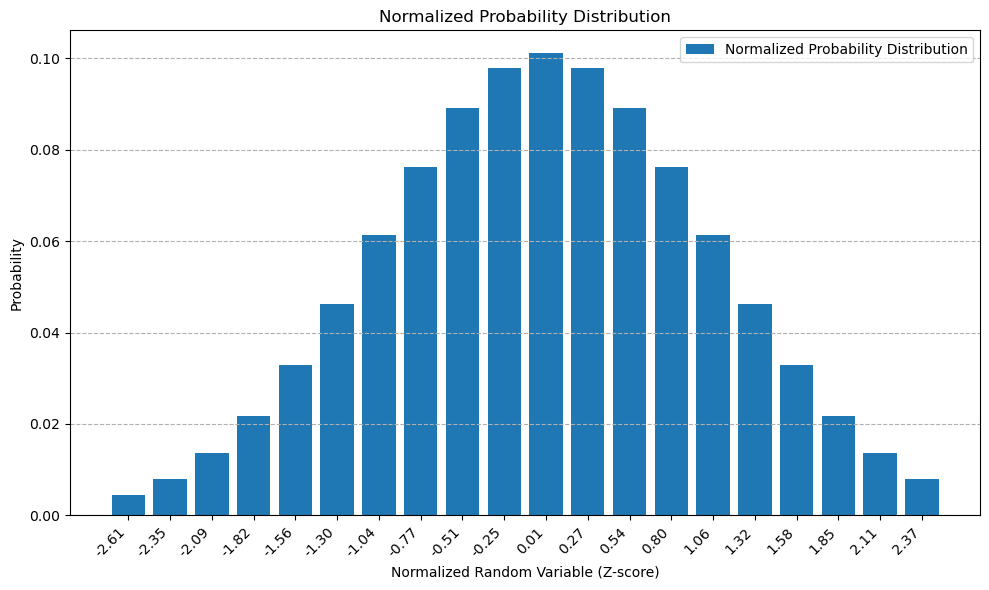

In [14]:
normalized_variables = list(normalized_prob_dist.keys())
normalized_probabilities = list(normalized_prob_dist.values())

plt.figure(figsize=(10, 6))
x_indices = np.arange(len(normalized_variables))
plt.bar(x_indices, normalized_probabilities, width=0.8, label='Normalized Probability Distribution')
plt.xlabel('Normalized Random Variable (Z-score)')
plt.ylabel('Probability')
plt.title('Normalized Probability Distribution')
plt.xticks(x_indices, [f'{var:.2f}' for var in normalized_variables], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()
